<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos. Importar Pandas, leer los archivos, usar info y .head() para conocer los datos en las tablas

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
orden=pd.read_csv('/datasets/instacart_orders.csv', sep=';')
productos=pd.read_csv('/datasets/products.csv', sep=';')
productos_orden=pd.read_csv('/datasets/order_products.csv', sep=';')
viveres=pd.read_csv('/datasets/aisles.csv', sep=';')
departamento=pd.read_csv('/datasets/departments.csv', sep=';')

In [3]:
# mostrar información del DataFrame
orden.info()
print(orden.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [4]:
# mostrar información del DataFrame
productos.info()
print(productos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# mostrar información del DataFrame
productos_orden.info()
print(productos_orden.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [6]:
# mostrar información del DataFrame
viveres.info()
print(viveres.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
# mostrar información del DataFrame
departamento.info()
print(departamento.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
    
La razón del porque no te aparecen todos los valores del dataframe `productos_orden` es porque es contiene mucha información y pandas trata de optimizar esto al no mostrar los resultados, pero le podemos indicar que lo haga de cualquier manera utilizando el siguiente argumento:
    
```
productos_orden.info(show_counts=True)    
```    
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.Los datos contienen un epaciador diferente a la coma por lo que se debe especificar el espaciador, para leerlos correctamente. Al imprimir las primeras filas de los archivos se observa que el espaciador es ";" por lo que al leer el archivo se usa el parametro sep para indicar esto y se puedan leer correctamente los archivos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos. Mostrar info para cada df, determinar el tipo de objeto para cada columna y determinar si el tipo de objeto va de acuerdo con el contenido en la columna. Usar el metodo isna y fillna para los valores ausente, usar el metodo duplicated y drop_duplicates para identificar y eliminar valores duplicados.   

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(orden.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_fil=orden.query("order_dow==3")
df_hora=df_fil.query("order_hour_of_day==2")
print(df_hora.duplicated().sum())

15


¿Qué sugiere este resultado? Los pedidos duplicados se hicieron los dias miercoles a las 2 a.m.

In [10]:
# Elimina los pedidos duplicado
orden=orden.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(orden.duplicated().sum())

0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orden.duplicated('order_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos: Se contaron las filas duplicadas en el df orden, se encontro que los dias miercoles a las 2 a.m.  

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(productos.duplicated().sum())

0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(productos.duplicated('department_id').sum())

49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
productos['product_name']=productos['product_name'].str.upper()

print(productos.duplicated('product_name').sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_vacio=productos[productos['product_name'].notna()]
print(df_vacio.duplicated('product_name').sum())

104


Describe brevemente tus hallazgos y lo que hiciste con ellos. No se encontraro filas completas duplicadas, pero si se encontraron nombres duplicados de productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departamento.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departamento.duplicated('department_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos. No se encontraron filas completas duplicadas, tampoco se encontro IDs duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(viveres.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(viveres.duplicated('aisle_id').sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos. No se encontraron filas completas duplicadas, tampoco se encontro IDs de pasillos duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(productos_orden.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(productos_orden.duplicated('order_id').sum())

4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos. No se encontraron filas completas duplicadas, pero si se encontraron ID de orden duplicados

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

print(productos['product_name'].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos. Hay productos sin nombre

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
df_sn=productos.query("aisle_id==100")

print(df_sn)
print(df_sn['product_name'].isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
1258


Describe brevemente cuáles son tus hallazgos. Si, todos los productos del pasillo 1OO no tienen nombre.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
df_dep=productos.query("department_id==21")
print(df_dep)
print(df_dep['product_name'].isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
1258


Describe brevemente cuáles son tus hallazgos. Si todos los productos sin nombre son del departamento 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
df_dp=productos.query("aisle_id==100 & department_id==21")
print(df_dp)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos. Todos los productos del pasillo 1OO y departamento 21 no tienen nombre.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
productos['product_name']=productos['product_name'].fillna(value='Unknown')
print(productos.query("aisle_id==100"))


       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos. En la columna de nombre del producto se sustituyeron los valores ausentes por la palabra "Unknown".

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(orden.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orden['order_dow'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos. solo la columna "days_since_prior_order" contiene valores ausentes.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Una manera de revisar si los valores ausentes pertenecen a los primeros pedidos del cliente puedes usar algo parecido a lo siguiente:
    
```
print(orden[orden['order_number'] > 1]['order_number'].isnull().sum())
```

La columna de `order_number` es la que nos dice el numero de orden de cada uno de los clientes
</div>


### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(productos_orden.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(productos_orden['add_to_cart_order'].min())

print(productos_orden['add_to_cart_order'].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos. Solo la columna "add_to_cart_order" contiene valores ausentes, el valor minimo es 1 y el maximo es 64, es decir el numero maximo de productos que un cliente ha comprado son 64.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_ausentes=productos_orden[productos_orden['add_to_cart_order'].isna()]
ID_pedidos=df_ausentes['order_id']

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? No
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

grupo_vausentes=df_ausentes.groupby("order_id")['product_id'].count()
grupo_vausentes.min()
print(grupo_vausentes.min())

1


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [35]:
# Código del revisor
productos_orden[productos_orden['order_id'].isin(ID_pedidos)].groupby('order_id')['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos. Se guardaron los pedidos que contenian valores ausentes en la columna 'add_to_cart_order'

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
productos_orden['add_to_cart_order']=productos_orden['add_to_cart_order'].fillna(999)

productos_orden['add_to_cart_order']=productos_orden['add_to_cart_order'].astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos. En la columna 'add_to_cart_order' los valores ausentes se sustituyeron por 999 y se conviertieron a tipo entero

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos1: Se verifico si habia valores ausentes y duplicados, los duplicados se eliminaron, los valores ausentes se sustituyeron por un valor o una palabra 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
print(orden['order_hour_of_day'].min())
print(orden['order_hour_of_day'].max())

print(orden['order_dow'].min())
print(orden['order_dow'].max())


0
23
0
6


Escribe aquí tus conclusiones: Los valores para la hora y el dia en que se realizo el pedido si son correctos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


<AxesSubplot:>

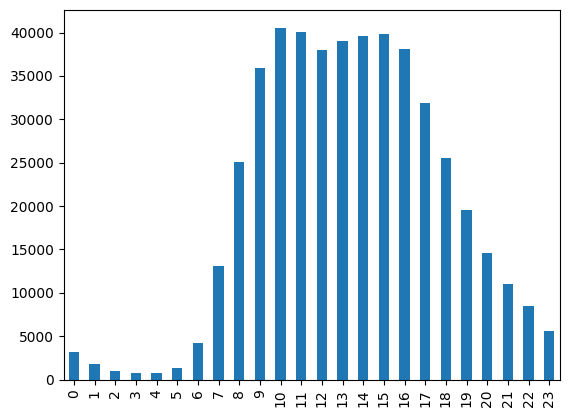

In [38]:
pedidos_hora=orden['order_hour_of_day'].value_counts()
pedidos_hora=pedidos_hora.sort_index()
print(pedidos_hora)
pedidos_hora.plot(kind='bar')

Escribe aquí tus conclusiones: Se hacen mas ventas de 9 am a 5 pm

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de presentar los datos
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


<AxesSubplot:>

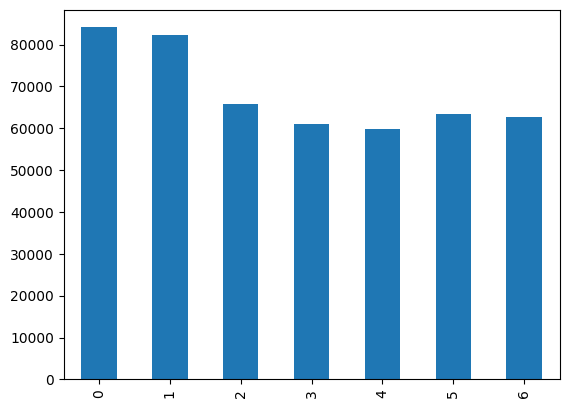

In [39]:
pedidos_dia=orden['order_dow'].value_counts()
pedidos_dia=pedidos_dia.sort_index()
print(pedidos_dia)
pedidos_dia.plot(kind='bar')

Escribe aquí tus conclusiones: los dias que mas se vende son los domigos y lunes. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:>

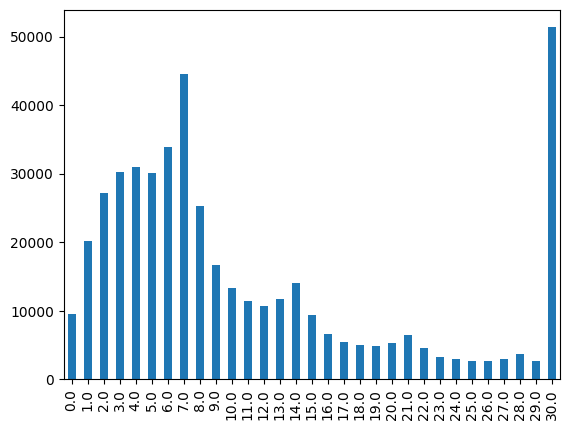

In [40]:
tiempo_transcurrido=orden['days_since_prior_order'].value_counts()
tiempo_transcurrido=tiempo_transcurrido.sort_index()
tiempo_transcurrido.plot(kind='bar')

Escribe aquí tus conclusiones:  La mayoria de la gente tarda 2 a 8 dias para volver a hacer un pedido. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos
<br />
Hasta este punto no podemos saber si realmente los usuarios esperan 30 días para realizar otra compra o es el sistema el que agrupa todas las compras que sean mayores a 30 días en el día 30. Con la gráfica podemos observar que la mayoría de usuarios se concentra entre 1 y 9 días donde después los números descienden gradualmente
</div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
df_miercoles=orden.query("order_dow==3")
m_hora=df_miercoles['order_hour_of_day'].value_counts()
m_hora=m_hora.sort_index()

In [42]:
df_sabados=orden.query("order_dow==6")
sa_hora=df_sabados['order_hour_of_day'].value_counts()

<AxesSubplot:title={'center':'Ventas por hora'}>

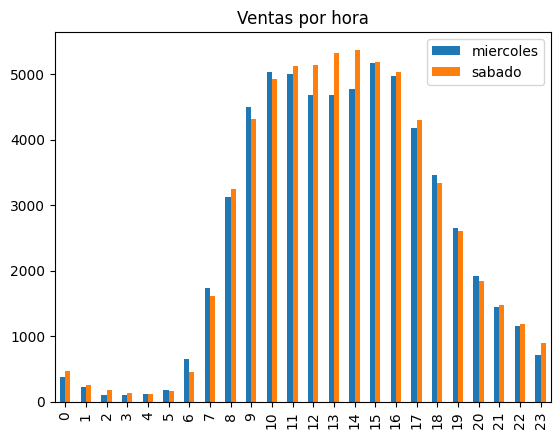

In [43]:
df_unido=pd.concat([m_hora, sa_hora], axis="columns")
df_unido.columns=['miercoles', 'sabado']
df_unido.plot(kind='bar', title='Ventas por hora')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días en una misma grafica
</div>


Escribe aquí tus conclusiones: Los sabados hay un poco mas de ventas de 12-2 p.m. que los miercoles

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

100


<AxesSubplot:>

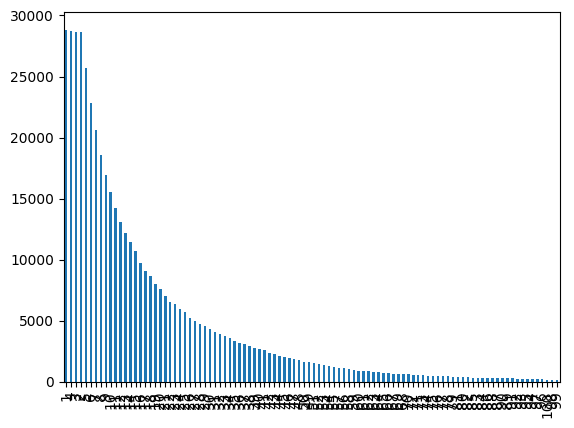

In [44]:
distribucion=orden['order_number'].value_counts()
print(orden['order_number'].max())
distribucion.plot(kind='bar')

Escribe aquí tus conclusiones. La mayoria de personas han realizado pocos pedidos (1-6 aproximadamente)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos, buenas observaciones.

</div>


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
productos_vendidos=productos_orden['product_id'].value_counts()
populares=productos_vendidos[0:20]

In [46]:
df_id=productos_orden.groupby('product_id').count()
df_id_ordenado=df_id.sort_values(by='order_id', ascending=False)
print(df_id_ordenado)
df_populares=df_id_ordenado.head(20)

            order_id  add_to_cart_order  reordered
product_id                                        
24852          66050              66050      66050
13176          53297              53297      53297
21137          37039              37039      37039
21903          33971              33971      33971
47209          29773              29773      29773
...              ...                ...        ...
5836               1                  1          1
43573              1                  1          1
43570              1                  1          1
36174              1                  1          1
41403              1                  1          1

[45573 rows x 3 columns]


In [47]:
df_unido_id=df_populares.merge(productos, on='product_id')
print(df_unido_id[['product_id', 'product_name']])

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


Escribe aquí tus conclusiones: Las bananas y las fresas es lo que mas se vende, en general los 20 productos mas vendidos son frutas y verduras

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
df_orden=productos_orden.groupby('order_id').count()
print(df_orden)
max=df_orden.max()
print(max)
promedio=df_orden['product_id'].mean()
print(promedio)
print(df_orden['product_id'].median())

          product_id  add_to_cart_order  reordered
order_id                                          
4                 13                 13         13
9                 15                 15         15
11                 5                  5          5
19                 3                  3          3
20                 8                  8          8
...              ...                ...        ...
3421034           17                 17         17
3421053            9                  9          9
3421071            5                  5          5
3421077            4                  4          4
3421079            1                  1          1

[450046 rows x 3 columns]
product_id           127
add_to_cart_order    127
reordered            127
dtype: int64
10.098983215049127
8.0


<AxesSubplot:ylabel='Frequency'>

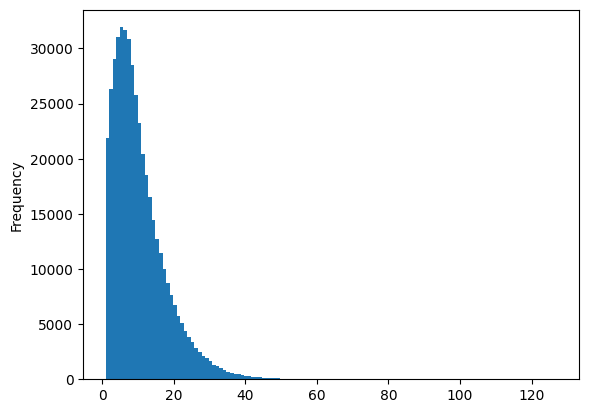

In [49]:
df_orden['product_id'].plot(kind='hist', bins=127)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


Escribe aquí tus conclusiones: En promedio las personas compran 10 articulos en cada pedido

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
df_recomprado=productos_orden.query("reordered==1")
print(df_recomprado)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
5         2456893       21616                  4          1
...           ...         ...                ...        ...
4544999   1622300       24852                  1          1
4545000   1125324       40600                  6          1
4545002    577211       15290                 12          1
4545004    692640       47766                  4          1
4545005    319435         691                  8          1

[2683838 rows x 4 columns]


In [51]:
df_pr=df_recomprado.groupby('product_id').count()
df_pr_ordenado=df_pr.sort_values(by='order_id', ascending=False)
df_populares_r=df_id_ordenado.head(20)
print(df_populares_r)

            order_id  add_to_cart_order  reordered
product_id                                        
24852          66050              66050      66050
13176          53297              53297      53297
21137          37039              37039      37039
21903          33971              33971      33971
47209          29773              29773      29773
47766          24689              24689      24689
47626          21495              21495      21495
16797          20018              20018      20018
26209          19690              19690      19690
27845          19600              19600      19600
27966          19197              19197      19197
22935          15898              15898      15898
24964          15292              15292      15292
45007          14584              14584      14584
39275          13879              13879      13879
49683          13675              13675      13675
28204          12544              12544      12544
5876           12232           

In [52]:
df_unido_r=df_populares_r.merge(productos, on='product_id')
print(df_unido_r[['product_id', 'product_name']])

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 
Buena manera de mostrar los resultados, los productos naturales son consistentemente los más vendidos
</div>


Escribe aquí tus conclusiones: De los productos que se vuelven a reordenar, los mas vendidos son bananas y fresas, en general frutas y verduras

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
productos

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [54]:
df_completa=productos_orden.merge(productos)

In [55]:
df_completa.groupby(['product_id', 'product_name'])['reordered'].mean()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
df_orden_productosorden=productos_orden.merge(orden)

In [57]:
df_orden_productosorden.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones. La mayoria de usuarios compran cosas que ya habian comprado

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [58]:
df_top=productos_orden.query("add_to_cart_order==1")

In [59]:
top_conteo=df_top.groupby('product_id').count()

In [60]:
top_conteo=top_conteo.sort_values(by='order_id', ascending=False)
df_nombre_top=top_conteo.merge(productos, on='product_id')
print(df_nombre_top[['product_id', 'product_name']].head(20))

    product_id                 product_name
0        24852                       BANANA
1        13176       BAG OF ORGANIC BANANAS
2        27845           ORGANIC WHOLE MILK
3        21137         ORGANIC STRAWBERRIES
4        47209         ORGANIC HASS AVOCADO
5        21903         ORGANIC BABY SPINACH
6        47766              ORGANIC AVOCADO
7        19660                 SPRING WATER
8        16797                 STRAWBERRIES
9        27966          ORGANIC RASPBERRIES
10       44632   SPARKLING WATER GRAPEFRUIT
11       49235          ORGANIC HALF & HALF
12       47626                  LARGE LEMON
13         196                         SODA
14       38689     ORGANIC REDUCED FAT MILK
15       26209                        LIMES
16       12341                HASS AVOCADOS
17        5785  ORGANIC REDUCED FAT 2% MILK
18       27086                  HALF & HALF
19       43352                  RASPBERRIES


Escribe aquí tus conclusiones: Las frutas, verduras y leche son los alimentos que se ponen en primer lugar en el carrito


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


### Conclusion general del proyecto:

Las frutas y verduras como el aguacate es lo que mas se vende. Los domingos y lunes se vende un poco mas.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
